## HW2 ASSIGNMENT 3

### OBJECTIVES

- Perform basic data engineering, visualization, and data analysis in Python using an external set of data.
- Use GeoPandas to analyze and map datasets
- Perform clustering using the Gaussian Mixture Model (EM) in SciKit-Learn
- Complete the online HW assessment.

### Importing Libraries

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import os
import json 
from datetime import datetime
import zipfile
import geopandas as gpd

### (20%) Perfom basic data engineering, visualization and data analysis in Python using an external set data.

### § Task: Use Python to obtain and prepare data.

In [2]:
# Check if the "data" directory exists, if not, create it
data_dir = "data"
if not os.path.exists(data_dir):
    os.makedirs(data_dir)

# Load the original CSV file
data = pd.read_csv("MN_EV_Registrations.csv")

# Save the loaded CSV file to the "data/" folder
data.to_csv(os.path.join(data_dir, "original_MN_EV_Registrations.csv"), index = False)


/tmp/ipykernel_942/1571238050.py:7: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("MN_EV_Registrations.csv")


### § Task: Transform, filter and store the data as a new CSV

In [3]:
ev_data = pd.read_csv("data/original_MN_EV_Registrations.csv")
ev_data

/tmp/ipykernel_942/3635182438.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  ev_data = pd.read_csv("data/original_MN_EV_Registrations.csv")


,State,ZIP Code,Registration Date,Vehicle Make,Vehicle Model,Vehicle Model Year,Drivetrain Type,Vehicle GVWR Class,Vehicle Category,Vehicle Count,DMV Snapshot ID,DMV Snapshot (Date),Latest DMV Snapshot Flag
0,MN,55337,10/1/2021,TESLA,MODEL 3,2018,BEV,1,Light-Duty (Class 1-2A),1,5,DMV Snapshot (2/1/2022),False
1,MN,55345,10/1/2021,TESLA,MODEL 3,2018,BEV,1,Light-Duty (Class 1-2A),1,5,DMV Snapshot (2/1/2022),False
2,MN,55077,10/1/2021,TESLA,MODEL 3,2018,BEV,1,Light-Duty (Class 1-2A),1,5,DMV Snapshot (2/1/2022),False
3,MN,55344,10/1/2021,TESLA,MODEL 3,2018,BEV,1,Light-Duty (Class 1-2A),1,5,DMV Snapshot (2/1/2022),False
4,MN,55416,10/1/2021,TESLA,MODEL 3,2018,BEV,1,Light-Duty (Class 1-2A),1,5,DMV Snapshot (2/1/2022),False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
368076,MN,55419,11/1/2023,CHEVROLET,BOLT EUV,2023,BEV,1,Light-Duty (Class 1-2A),3,14,DMV Snapshot (1/13/2024),True
368077,MN,55417,3/1/2023,CHEVROLET,BOLT EUV,2023,BEV,1,Light-Duty (Class 1-2A),3,12,DMV Snapshot (7/1/2023),False
368078,MN,55410,10/1/2023,CHEVROLET,BOLT EUV,2023,BEV,1,Light-Duty (Class 1-2A),3,13,DMV Snapshot (11/21/2023),False
368079,MN,55410,10/1/2023,CHEVROLET,BOLT EUV,2023,BEV,1,Light-Duty (Class 1-2A),3,14,DMV Snapshot (1/13/2024),True


In [4]:
ev_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368081 entries, 0 to 368080
Data columns (total 13 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   State                     368081 non-null  object
 1   ZIP Code                  368081 non-null  object
 2   Registration Date         368079 non-null  object
 3   Vehicle Make              368081 non-null  object
 4   Vehicle Model             368081 non-null  object
 5   Vehicle Model Year        368081 non-null  int64 
 6   Drivetrain Type           368081 non-null  object
 7   Vehicle GVWR Class        368081 non-null  object
 8   Vehicle Category          368081 non-null  object
 9   Vehicle Count             368081 non-null  int64 
 10  DMV Snapshot ID           368081 non-null  int64 
 11  DMV Snapshot (Date)       368081 non-null  object
 12  Latest DMV Snapshot Flag  368081 non-null  bool  
dtypes: bool(1), int64(3), object(9)
memory usage: 34.0+ MB


In [5]:
# Convert 'Registration Date' column to datetime and extract the year
ev_data['registration_year'] = pd.to_datetime(ev_data['Registration Date']).dt.year
ev_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368081 entries, 0 to 368080
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   State                     368081 non-null  object 
 1   ZIP Code                  368081 non-null  object 
 2   Registration Date         368079 non-null  object 
 3   Vehicle Make              368081 non-null  object 
 4   Vehicle Model             368081 non-null  object 
 5   Vehicle Model Year        368081 non-null  int64  
 6   Drivetrain Type           368081 non-null  object 
 7   Vehicle GVWR Class        368081 non-null  object 
 8   Vehicle Category          368081 non-null  object 
 9   Vehicle Count             368081 non-null  int64  
 10  DMV Snapshot ID           368081 non-null  int64  
 11  DMV Snapshot (Date)       368081 non-null  object 
 12  Latest DMV Snapshot Flag  368081 non-null  bool   
 13  registration_year         368079 non-null  f

In [6]:
# From the above we can see that the Registration year has two null values we will remove those two values
# Remove rows with missing or non-finite values in 'registration_year' column
ev_data = ev_data.dropna(subset = ['registration_year'])

# Convert 'registration_year' column to integer
ev_data = ev_data.copy()  # Create a copy of the DataFrame
ev_data['registration_year'] = ev_data['registration_year'].astype(int)

In [7]:
# Filter out vehicle makes with less than 100 registrations
makes_counts = ev_data['Vehicle Make'].value_counts()
valid_makes = makes_counts[makes_counts > 100].index
dropped_makes = makes_counts[makes_counts <= 100]  # Count of dropped makes
total_dropped_count = dropped_makes.sum()  # Total count of dropped makes
print(f"Number of makes dropped: {len(dropped_makes)}")
print(f"Total count of dropped makes: {total_dropped_count}")

Number of makes dropped: 22
Total count of dropped makes: 455


In [8]:
# Filtered DataFrame
ev_filtered_data = ev_data[ev_data['Vehicle Make'].isin(valid_makes)]

# Filter columns
ev_filtered_data = ev_filtered_data[['ZIP Code', 'Vehicle Make', 'Vehicle Model', 'registration_year', 'Vehicle Model Year']]

# Save the filtered data to the "data/" folder
ev_filtered_data.to_csv("data/FILTERED_MN_EV_Registrations.csv", index = False)

In [9]:
EV_Filtered_data = pd.read_csv("data/FILTERED_MN_EV_Registrations.csv")
EV_Filtered_data

,ZIP Code,Vehicle Make,Vehicle Model,registration_year,Vehicle Model Year
0,55337,TESLA,MODEL 3,2021,2018
1,55345,TESLA,MODEL 3,2021,2018
2,55077,TESLA,MODEL 3,2021,2018
3,55344,TESLA,MODEL 3,2021,2018
4,55416,TESLA,MODEL 3,2021,2018
...,...,...,...,...,...
367619,55419,CHEVROLET,BOLT EUV,2023,2023
367620,55417,CHEVROLET,BOLT EUV,2023,2023
367621,55410,CHEVROLET,BOLT EUV,2023,2023
367622,55410,CHEVROLET,BOLT EUV,2023,2023


### § Task: Plot the data using a Bar graph

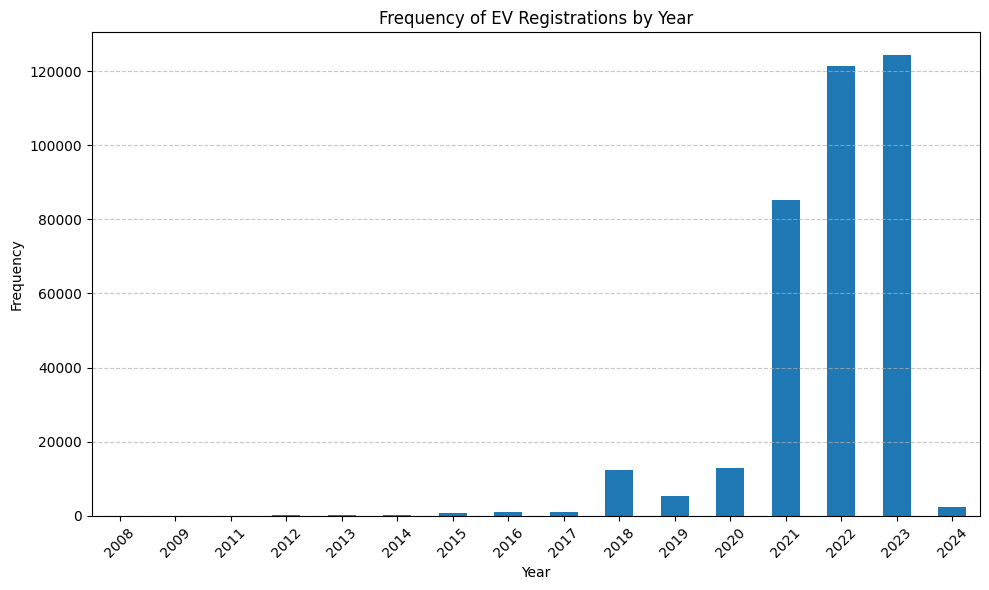

In [10]:
import matplotlib.pyplot as plt

# Group by registration year and count the frequency of registrations
registration_freq = EV_Filtered_data['registration_year'].value_counts().sort_index()

# Plotting
plt.figure(figsize = (10, 6))
registration_freq.plot(kind = 'bar')
plt.title('Frequency of EV Registrations by Year')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

### § Task: React to the following statements:.

In [11]:
# Calculate total registrations by year
total_registrations_by_year = EV_Filtered_data['registration_year'].value_counts().sort_index()

# Check if the largest number of new registrations was in 2023
largest_registrations_year = total_registrations_by_year.idxmax()

# Check if the number of new registrations slowed in 2019
previous_year_registrations = total_registrations_by_year[2019]
current_year_registrations = total_registrations_by_year[2020]
registrations_slowed = current_year_registrations < previous_year_registrations

print("Reaction to the statements:")
print(f"1. The largest number of new registrations was in {largest_registrations_year}.")
print(f"2. The number of new registrations slowed in 2019: {registrations_slowed}")

Reaction to the statements:
1. The largest number of new registrations was in 2023.
2. The number of new registrations slowed in 2019: False


### (30%) Use GeoPandas analyze and map datasets

In [12]:
!pip install geopandas mapclassify folium

  Using cached folium-0.16.0-py2.py3-none-any.whl.metadata (3.6 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 2.0 MB/s eta 0:00:00
  Using cached branca-0.7.1-py3-none-any.whl.metadata (1.5 kB)
  Using cached Jinja2-3.1.3-py3-none-any.whl.metadata (3.3 kB)
  Using cached xyzservices-2024.4.0-py3-none-any.whl.metadata (4.0 kB)
  Using cached click-8.1.7-py3-none-any.whl.metadata (3.0 kB)
  Using cached click_plugins-1.1.1-py2.py3-none-any.whl.metadata (6.4 kB)
  Using cached cligj-0.7.2-py3-none-any.whl.metadata (5.0 kB)
  Using cached MarkupSafe-2.1.5-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (3.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 24.0 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 kB 3.3 MB/s eta 0:00:00
Using cached folium-0.16.0-py2.py3-none-any.whl (100 kB)
Using cached branca-0.7.1-py3-none-any.whl (25 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 104.5 MB/s eta 0:00:0000:

### § Task: Load the Shapefile from the Minnesota ACS

In [13]:
# URL of the file to download
url = "https://resources.gisdata.mn.gov/pub/gdrs/data/pub/us_mn_state_metc/society_census_acs/shp_society_census_acs.zip"

# Send a GET request to the URL
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Open a new file in binary write mode
    with open("shp_society_census_acs.zip", "wb") as f:
        # Write the content of the response to the file
        f.write(response.content)
    print("Download successful")
else:
    print("Failed to download file")

Download successful


In [14]:
# URL of the file to download
url = "https://resources.gisdata.mn.gov/pub/gdrs/data/pub/us_mn_state_mngeo/bdry_zip_code_tabulation_areas/shp_bdry_zip_code_tabulation_areas.zip"

# Send a GET request to the URL
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Open a new file in binary write mode
    with open("shp_bdry_zip_code_tabulation_areas.zip", "wb") as f:
        # Write the content of the response to the file
        f.write(response.content)
    print("Download successful")
else:
    print("Failed to download file")

Download successful


In [16]:
# Unzipping the files
# Create a directory named 'acs'
os.makedirs('acs', exist_ok = True)

# Path to the zip file
zip_file_path = 'shp_society_census_acs.zip'

# Extract the contents of the zip file into the 'data' directory
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('acs')

In [17]:
# Unzipping the files
# Create a directory named 'acs'
os.makedirs('shp', exist_ok = True)

# Path to the zip file
zip_file_path = 'shp_bdry_zip_code_tabulation_areas.zip'

# Extract the contents of the zip file into the 'data' directory
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('shp')

In [24]:
# Loading the shape files 
shape_data = gpd.read_file('shp/')
shape_data.head()

,ZCTA5CE20,GEOID20,CLASSFP20,MTFCC20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,Shape_Leng,Shape_Area,geometry
0,58225,58225,B5,G6350,S,606125347.0,6393582.0,+48.6112378,-097.2227786,2.161931,0.074699,"POLYGON ((-97.42610 48.71765, -97.42606 48.717..."
1,58030,58030,B5,G6350,S,340133596.0,0.0,+46.0303340,-096.6681855,0.986934,0.039525,"POLYGON ((-96.80449 46.06586, -96.80142 46.065..."
2,56744,56744,B5,G6350,S,248778008.0,4597395.0,+48.2325749,-097.1171828,1.619517,0.030674,"POLYGON ((-97.20443 48.21641, -97.20007 48.216..."
3,57030,57030,B5,G6350,S,343925640.0,1017610.0,+43.7357247,-096.5437100,1.317356,0.038536,"POLYGON ((-96.69131 43.67476, -96.69131 43.674..."
4,56164,56164,B5,G6350,S,622930148.0,720071.0,+44.0538343,-096.3330076,1.873075,0.070037,"POLYGON ((-96.50638 43.93486, -96.50638 43.934..."


In [30]:
shape_data.info

<bound method DataFrame.info of     ZCTA5CE20 GEOID20 CLASSFP20 MTFCC20 FUNCSTAT20      ALAND20   AWATER20  \
0       58225   58225        B5   G6350          S  606125347.0  6393582.0   
1       58030   58030        B5   G6350          S  340133596.0        0.0   
2       56744   56744        B5   G6350          S  248778008.0  4597395.0   
3       57030   57030        B5   G6350          S  343925640.0  1017610.0   
4       56164   56164        B5   G6350          S  622930148.0   720071.0   
..        ...     ...       ...     ...        ...          ...        ...   
882     56723   56723        B5   G6350          S  312538590.0        0.0   
883     55431   55431        B5   G6350          S   20267417.0   579568.0   
884     56287   56287        B5   G6350          S    1148907.0     1268.0   
885     56121   56121        B5   G6350          S   95633270.0  9717937.0   
886     56140   56140        B5   G6350          S     245303.0        0.0   

      INTPTLAT20    INTPTLON20 

In [22]:
shape_data.columns

Index(['ZCTA5CE20', 'GEOID20', 'CLASSFP20', 'MTFCC20', 'FUNCSTAT20', 'ALAND20',
       'AWATER20', 'INTPTLAT20', 'INTPTLON20', 'Shape_Leng', 'Shape_Area',
       'geometry'],
      dtype='object')

<Axes: >

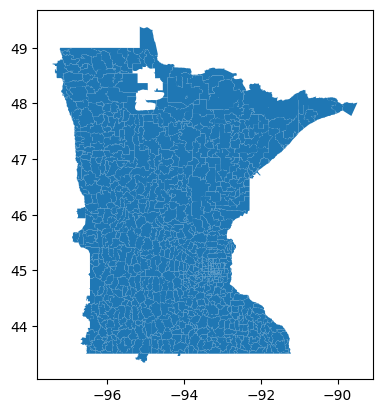

In [23]:
shape_data.plot()

In [25]:
# Loading the data files (acs files)
acs_data = gpd.read_file("acs/CensusACSZipCode.dbf")
acs_data.head()

,GEOG_UNIT,GEOG_LEVEL,GEOID,GEOID2,SUMLEV,GEONAME,GEOCOMP,HUINTRVWS,PERINTRVWS,SOURCE,...,POP234,POPMF5,POPMOBILE,POPOTHER,PPHSF,PPH234,PPHMF5,PPHMOBILE,PPHOTHER,geometry
0,54001,ZCTA,860Z200US54001,54001,860,ZCTA5 54001,00,None,None,ACS 2018-2022,...,157.0,161.0,575.0,13.0,2.58,2.01,1.01,2.05,1.86,None
1,54002,ZCTA,860Z200US54002,54002,860,ZCTA5 54002,00,None,None,ACS 2018-2022,...,503.0,116.0,112.0,0.0,2.77,2.17,1.00,1.81,0.00,None
2,54003,ZCTA,860Z200US54003,54003,860,ZCTA5 54003,00,None,None,ACS 2018-2022,...,8.0,0.0,50.0,0.0,2.87,4.00,0.00,1.61,0.00,None
3,54004,ZCTA,860Z200US54004,54004,860,ZCTA5 54004,00,None,None,ACS 2018-2022,...,62.0,23.0,207.0,0.0,2.43,1.94,1.64,2.76,0.00,None
4,54005,ZCTA,860Z200US54005,54005,860,ZCTA5 54005,00,None,None,ACS 2018-2022,...,16.0,70.0,217.0,0.0,2.69,2.29,1.11,2.97,0.00,None


In [29]:
acs_data.info

<bound method DataFrame.info of      GEOG_UNIT GEOG_LEVEL           GEOID GEOID2 SUMLEV      GEONAME GEOCOMP  \
0        54001       ZCTA  860Z200US54001  54001    860  ZCTA5 54001      00   
1        54002       ZCTA  860Z200US54002  54002    860  ZCTA5 54002      00   
2        54003       ZCTA  860Z200US54003  54003    860  ZCTA5 54003      00   
3        54004       ZCTA  860Z200US54004  54004    860  ZCTA5 54004      00   
4        54005       ZCTA  860Z200US54005  54005    860  ZCTA5 54005      00   
...        ...        ...             ...    ...    ...          ...     ...   
1011     56759       ZCTA  860Z200US56759  56759    860  ZCTA5 56759      00   
1012     56760       ZCTA  860Z200US56760  56760    860  ZCTA5 56760      00   
1013     56761       ZCTA  860Z200US56761  56761    860  ZCTA5 56761      00   
1014     56762       ZCTA  860Z200US56762  56762    860  ZCTA5 56762      00   
1015     56763       ZCTA  860Z200US56763  56763    860  ZCTA5 56763      00   

     HU

##### Merging the two files since only one has the geometry and also considering GEOID, GEOID2 and GEOID20 are same 

In [31]:
zcta_data = shape_data.merge(gpd.GeoDataFrame(acs_data), left_on = "GEOID20", right_on = "GEOID2")
zcta_data.head()

,ZCTA5CE20,GEOID20,CLASSFP20,MTFCC20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,Shape_Leng,...,POP234,POPMF5,POPMOBILE,POPOTHER,PPHSF,PPH234,PPHMF5,PPHMOBILE,PPHOTHER,geometry_y
0,56744,56744,B5,G6350,S,248778008.0,4597395.0,+48.2325749,-097.1171828,1.619517,...,20.0,0.0,152.0,0.0,2.16,5.00,0.00,3.90,0.0,None
1,56164,56164,B5,G6350,S,622930148.0,720071.0,+44.0538343,-096.3330076,1.873075,...,96.0,368.0,61.0,0.0,2.48,1.13,1.44,1.56,0.0,None
2,56257,56257,B5,G6350,S,238523752.0,1729037.0,+44.9692575,-096.4021512,1.083409,...,0.0,0.0,10.0,0.0,2.42,0.00,0.00,3.33,0.0,None
3,56219,56219,B5,G6350,S,231328051.0,10745351.0,+45.5972898,-096.8178738,1.309592,...,5.0,21.0,23.0,0.0,2.58,1.00,1.31,2.09,0.0,None
4,56144,56144,B5,G6350,S,311265936.0,640627.0,+43.8385925,-096.3868026,1.253775,...,3.0,26.0,14.0,0.0,2.32,1.00,1.86,1.17,0.0,None


In [32]:
# Setting the geometry_X because geometry_y has None values 
zcta_data = zcta_data.set_geometry("geometry_x")

<Axes: >

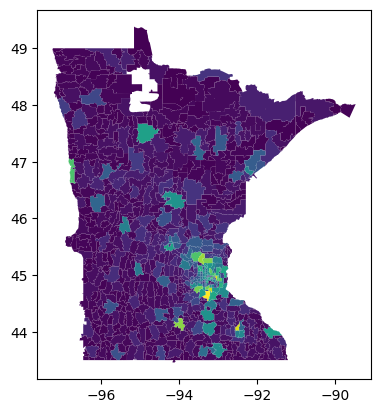

In [53]:
zcta_data.plot("POPTOTAL")